In [40]:
!pip install ucimlrepo scikit-learn matplotlib -q

In [3]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 
  
# metadata 
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print(myocardial_infarction_complications.variables) 

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'tit

In [4]:
X.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [6]:
y.head()

,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
X.isna().mean().sort_values()

SEX           0.000000
IM_PG_P       0.000588
INF_ANAM      0.002353
NA_R_1_n      0.002941
zab_leg_06    0.004118
                ...   
NOT_NA_KB     0.403529
S_AD_KBRIG    0.632941
D_AD_KBRIG    0.632941
IBS_NASL      0.957647
KFK_BLOOD     0.997647
Length: 111, dtype: float64

In [20]:
y['LET_IS'].value_counts(normalize=True)

LET_IS
0    0.840588
1    0.064706
3    0.031765
7    0.015882
6    0.015882
4    0.013529
2    0.010588
5    0.007059
Name: proportion, dtype: float64

In [21]:
pd.set_option('display.max_columns', 200)

X.head(2)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [56]:
X.shape

(1700, 111)

In [28]:
myocardial_infarction_complications.variables.query('role=="Feature"')['type'].value_counts()

type
Binary         78
Categorical    16
Integer        10
Continuous      7
Name: count, dtype: int64

In [61]:
y.shape

(1700, 12)

In [60]:
myocardial_infarction_complications.variables.query('type=="Integer"')['description'].values

array(['Record ID (ID): Unique identifier. Cannot be related to participant. It can be used for reference only.',
       'Age of patient.',
       'Systolic blood pressure according to Emergency Cardiology Team ',
       'Diastolic blood pressure according to Emergency Cardiology Team',
       'Systolic blood pressure according to intensive care unit',
       'Diastolic blood pressure according to intensive care unit',
       'Use of opioid drugs in the ICU in the first hours of the hospital period ',
       'Use of opioid drugs in the ICU in the second day of the hospital period ',
       'Use of opioid drugs in the ICU in the third day of the hospital period ',
       'Use of NSAIDs in the ICU in the second day of the hospital period ',
       'Use of NSAIDs in the ICU in the third day of the hospital period '],
      dtype=object)

In [35]:
y['LET_IS'].value_counts()

LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64

In [37]:
for c in y.columns:
    display(y[c].value_counts())

FIBR_PREDS
0    1530
1     170
Name: count, dtype: int64

PREDS_TAH
0    1680
1      20
Name: count, dtype: int64

JELUD_TAH
0    1658
1      42
Name: count, dtype: int64

FIBR_JELUD
0    1629
1      71
Name: count, dtype: int64

A_V_BLOK
0    1643
1      57
Name: count, dtype: int64

OTEK_LANC
0    1541
1     159
Name: count, dtype: int64

RAZRIV
0    1646
1      54
Name: count, dtype: int64

DRESSLER
0    1625
1      75
Name: count, dtype: int64

ZSN
0    1306
1     394
Name: count, dtype: int64

REC_IM
0    1541
1     159
Name: count, dtype: int64

P_IM_STEN
0    1552
1     148
Name: count, dtype: int64

LET_IS
0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: count, dtype: int64

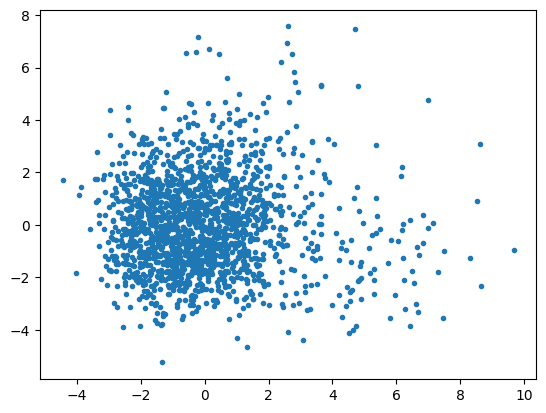

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_norm = scaler.fit_transform(X.fillna(0))
pca = PCA(n_components=50)
X_comp = pca.fit_transform(X_norm)

plt.plot(X_comp[:,0], X_comp[:,1],'.')

In [55]:
((pca.explained_variance_)/pca.explained_variance_.sum()).cumsum()

array([0.04951329, 0.09462316, 0.13654642, 0.17272759, 0.20733921,
       0.23842917, 0.26818511, 0.29491395, 0.31914635, 0.34288061,
       0.36605479, 0.38821199, 0.40985785, 0.43068996, 0.45100401,
       0.47103367, 0.49063392, 0.50965466, 0.52812186, 0.54634399,
       0.56445223, 0.58221015, 0.59952072, 0.61666265, 0.63354012,
       0.65030964, 0.66672537, 0.68304079, 0.69932215, 0.71536397,
       0.73108579, 0.74671284, 0.76210544, 0.77734615, 0.79234223,
       0.8071406 , 0.82171526, 0.83618772, 0.85060581, 0.86479458,
       0.8788697 , 0.89280744, 0.90663345, 0.92027175, 0.93379828,
       0.94729522, 0.96066615, 0.97388461, 0.98697143, 1.        ])

In [109]:
dfc = X.corr().stack().reset_index()
dfc.columns = ['source','target','weight']
dfc['weight'] = dfc['weight'].abs()
dfc = dfc[dfc['source']!=dfc['target']]
print(dfc.shape)
# Minimo del valor absoluto de la máxima correlación agrupada por variable
# "Todas las variables deben tener al menos una conexión"
dfc = dfc[dfc['weight']>7.2e-2] 
print(dfc['source'].nunique())
display(dfc)

(11932, 3)
111


,source,target,weight
1,AGE,SEX,0.394250
2,AGE,INF_ANAM,0.098238
3,AGE,STENOK_AN,0.232969
4,AGE,FK_STENOK,0.198185
5,AGE,IBS_POST,0.103516
...,...,...,...
11979,TRENT_S_n,post_im,0.082165
11989,TRENT_S_n,n_r_ecg_p_03,0.077845
12026,TRENT_S_n,NA_KB,0.076997
12028,TRENT_S_n,LID_KB,0.074802


In [110]:
dfc['weight'].describe()

count    1432.000000
mean        0.172756
std         0.167894
min         0.072205
25%         0.086987
50%         0.108139
75%         0.164250
max         1.000000
Name: weight, dtype: float64

In [111]:
dfc.to_csv('grafo_correlaciones.csv', index=None)

In [78]:
# El archivo CSV se procesa en el programa Gephi, para construir la figura y obtener los clusters.

(216, 3)

In [116]:
df_clusters = pd.read_csv('clusters.csv')

In [118]:
df_clusters['modularity_class'].value_counts()

modularity_class
0    38
2    34
3    27
1     8
4     4
Name: count, dtype: int64

In [161]:
list_vars = df_clusters.query('modularity_class==0')['Id'].unique()

from sklearn.decomposition import PCA
pca = PCA(n_components=len(list_vars), random_state=42)
pca.fit(X[list_vars].fillna(0))
(pca.explained_variance_)/(pca.explained_variance_.sum())

array([5.11187404e-01, 3.57084917e-01, 4.96441262e-02, 2.80156399e-02,
       2.03536761e-02, 1.26211217e-02, 3.73934895e-03, 2.43682398e-03,
       2.06827157e-03, 1.73211622e-03, 1.45726108e-03, 1.32706122e-03,
       1.28102213e-03, 1.09064308e-03, 7.22378434e-04, 6.49874106e-04,
       6.09815452e-04, 5.22229698e-04, 4.80643740e-04, 4.28901498e-04,
       3.51456926e-04, 3.32230757e-04, 3.05573093e-04, 2.95406596e-04,
       2.86026808e-04, 2.20661634e-04, 1.88867770e-04, 1.13986669e-04,
       1.11570158e-04, 9.81274354e-05, 7.42739857e-05, 4.91989146e-05,
       3.45763060e-05, 2.85182330e-05, 2.31278281e-05, 2.24410644e-05,
       7.10236376e-06, 3.57809501e-06])

In [128]:
list_vars = df_clusters.query('modularity_class==1')['Id'].unique()

from sklearn.decomposition import PCA
pca = PCA(n_components=len(list_vars), random_state=42)
pca.fit(X[list_vars].fillna(0))
(pca.explained_variance_)/(pca.explained_variance_.sum())

array([0.40175463, 0.24797373, 0.12841189, 0.10279159, 0.04935751,
       0.04273208, 0.02593846, 0.00104009])

In [129]:
list_vars = df_clusters.query('modularity_class==2')['Id'].unique()

from sklearn.decomposition import PCA
pca = PCA(n_components=len(list_vars), random_state=42)
pca.fit(X[list_vars].fillna(0))
(pca.explained_variance_)/(pca.explained_variance_.sum())

array([6.40378291e-01, 3.49920194e-01, 5.65562365e-03, 3.01574817e-03,
       8.83997697e-04, 6.67818138e-05, 2.17569304e-05, 1.67724603e-05,
       1.54969608e-05, 4.03716822e-06, 2.81642532e-06, 2.51679830e-06,
       2.30092410e-06, 2.07888164e-06, 1.86695063e-06, 1.68603919e-06,
       1.57642085e-06, 1.38677281e-06, 1.00353737e-06, 7.73288389e-07,
       4.99575200e-07, 4.64778825e-07, 4.25078000e-07, 4.17837711e-07,
       3.12588589e-07, 2.54574558e-07, 2.29977475e-07, 1.22789120e-07,
       1.07353914e-07, 1.07010500e-07, 1.04986825e-07, 1.01156017e-07,
       9.84261957e-08, 4.85629333e-08])

In [130]:
list_vars = df_clusters.query('modularity_class==3')['Id'].unique()

from sklearn.decomposition import PCA
pca = PCA(n_components=len(list_vars), random_state=42)
pca.fit(X[list_vars].fillna(0))
(pca.explained_variance_)/(pca.explained_variance_.sum())

array([0.35025465, 0.24284241, 0.11607918, 0.0468997 , 0.04507012,
       0.03819044, 0.02549714, 0.01916428, 0.01629073, 0.01498571,
       0.01428343, 0.01390197, 0.00995173, 0.00958196, 0.00640138,
       0.00514584, 0.00447211, 0.00396562, 0.00341105, 0.0032938 ,
       0.00306117, 0.00243492, 0.00163065, 0.00129682, 0.00105807,
       0.0004316 , 0.00040353])

In [136]:
list_vars = df_clusters.query('modularity_class==4')['Id'].unique()

from sklearn.decomposition import PCA
pca = PCA(n_components=len(list_vars), random_state=42)
pca.fit(X[list_vars].fillna(0))
(pca.explained_variance_)/(pca.explained_variance_.sum())

array([9.99772482e-01, 1.85456792e-04, 3.68770059e-05, 5.18459415e-06])

In [144]:
X_decomp = []

list_vars = df_clusters.query('modularity_class==0')['Id'].unique()
pca = PCA(n_components=2, random_state=42)
xpca = pd.DataFrame(pca.fit_transform(X[list_vars].fillna(0)))
xpca.columns = ['c0_pca_0','c0_pca_1']
X_decomp.append(xpca)

list_vars = df_clusters.query('modularity_class==1')['Id'].unique()
pca = PCA(n_components=4, random_state=42)
xpca = pd.DataFrame(pca.fit_transform(X[list_vars].fillna(0)))
xpca.columns = ['c1_pca_0','c1_pca_1','c1_pca_2','c1_pca_3']
X_decomp.append(xpca)

list_vars = df_clusters.query('modularity_class==2')['Id'].unique()
pca = PCA(n_components=2, random_state=42)
xpca = pd.DataFrame(pca.fit_transform(X[list_vars].fillna(0)))
xpca.columns = ['c2_pca_0','c2_pca_1']
X_decomp.append(xpca)

list_vars = df_clusters.query('modularity_class==3')['Id'].unique()
pca = PCA(n_components=3, random_state=42)
xpca = pd.DataFrame(pca.fit_transform(X[list_vars].fillna(0)))
xpca.columns = ['c3_pca_0','c3_pca_1','c3_pca_2']
X_decomp.append(xpca)

list_vars = df_clusters.query('modularity_class==4')['Id'].unique()
pca = PCA(n_components=1, random_state=42)
xpca = pd.DataFrame(pca.fit_transform(X[list_vars].fillna(0)))
xpca.columns = ['c4_pca_0']
X_decomp.append(xpca)

X_decomp = pd.concat(X_decomp, axis=1)

In [148]:
print(df_clusters.query('modularity_class==0')['Id'].unique())
print(df_clusters.query('modularity_class==1')['Id'].unique())
print(df_clusters.query('modularity_class==2')['Id'].unique())
print(df_clusters.query('modularity_class==3')['Id'].unique())
print(df_clusters.query('modularity_class==4')['Id'].unique())

['AGE' 'SEX' 'INF_ANAM' 'STENOK_AN' 'FK_STENOK' 'IBS_POST' 'endocr_01'
 'zab_leg_02' 'lat_im' 'n_r_ecg_p_01' 'fibr_ter_03' 'KFK_BLOOD' 'ROE'
 'NITR_S' 'B_BLOK_S_n' 'GEPAR_S_n' 'endocr_02' 'endocr_03' 'LID_S_n'
 'ant_im' 'post_im' 'R_AB_1_n' 'NA_R_1_n' 'n_r_ecg_p_03' 'L_BLOOD' 'NA_KB'
 'LID_KB' 'n_r_ecg_p_04' 'n_p_ecg_p_11' 'TIME_B_S' 'NOT_NA_KB'
 'fibr_ter_05' 'n_p_ecg_p_01' 'zab_leg_01' 'fibr_ter_02' 'inf_im'
 'TRENT_S_n' 'fibr_ter_01']
['R_AB_2_n' 'NA_R_2_n' 'R_AB_3_n' 'NA_R_3_n' 'NOT_NA_1_n' 'np_01'
 'NOT_NA_3_n' 'NOT_NA_2_n']
['IBS_NASL' 'GB' 'DLIT_AG' 'S_AD_KBRIG' 'n_p_ecg_p_03' 'ALT_BLOOD'
 'S_AD_ORIT' 'D_AD_ORIT' 'K_SH_POST' 'nr_02' 'nr_08' 'zab_leg_04'
 'D_AD_KBRIG' 'FIB_G_POST' 'IM_PG_P' 'n_p_ecg_p_12' 'fibr_ter_06'
 'fibr_ter_07' 'AST_BLOOD' 'TIKL_S_n' 'SIM_GIPERT' 'np_04' 'GT_POST'
 'n_p_ecg_p_04' 'np_09' 'ritm_ecg_p_06' 'n_p_ecg_p_06' 'n_p_ecg_p_05'
 'ANT_CA_S_n' 'ASP_S_n' 'ritm_ecg_p_04' 'n_r_ecg_p_09' 'n_r_ecg_p_10'
 'fibr_ter_08']
['ZSN_A' 'nr_04' 'zab_leg_03' 'O_L_POST'

In [151]:
df_clusters.query('modularity_class==0')['Id'].nunique()

38

In [159]:
dfe = myocardial_infarction_complications.variables
dfe[dfe['name'].isin(df_clusters.query('modularity_class==4')['Id'].unique())]['description'].values

array(['Hypokalemia ( < 4 mmol/L)', 'Serum potassium content',
       'Increase of sodium in serum (more than 150 mmol/L)',
       'Serum sodium content'], dtype=object)